In [1]:
#Same code as the challenge of the temperature.

In [2]:
# Data manipulation
import numpy as np
import pandas as pd

pd.set_option("display.max_columns", None)

# Data Visualiation
import matplotlib.pyplot as plt
import seaborn as sns

# System
import os

# Deep Learning
import tensorflow as tf

# Checking data types
from typing import Dict, List, Tuple, Sequence
import string

2023-06-12 12:16:28.377976: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-12 12:16:29.041698: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-06-12 12:16:29.041751: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-06-12 12:16:29.144372: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-06-12 12:16:31.539345: W tensorflow/stream_executor/platform/de

In [3]:
url = "/home/yass/code/yass2803/cryptoteller/data/BTCUSDT.csv"
df = pd.read_csv(url)
display(df.head(2))
print(f"df.shape = {df.shape}")

,open_time,open,high,low,close,volume,close_time,qav,num_trades,taker_base_vol,taker_quote_vol,ignore
0,1577836800000,7195.24,7245.00,7175.46,7224.21,3646.232354,1577858399999,2.631450e+07,44901,1987.278850,1.434351e+07,0
1,1577858400000,7224.24,7237.73,7180.00,7197.20,4415.466238,1577879999999,3.182890e+07,51073,2173.642319,1.566963e+07,0


df.shape = (4984, 12)


In [4]:
# Change the time unit of the "open_time" and "close_time" columns
df["open_time"] = pd.to_datetime(df["open_time"], unit='ms', origin='unix')
df = df.drop(columns=["close_time"])
df = df.set_index('open_time')


In [5]:
df.shape

(4984, 10)

In [6]:
df.head(10)

,open,high,low,close,volume,qav,num_trades,taker_base_vol,taker_quote_vol,ignore
open_time,,,,,,,,,,
2020-01-01 00:00:00,7195.24,7245.00,7175.46,7224.21,3646.232354,2.631450e+07,44901,1987.278850,1.434351e+07,0
2020-01-01 06:00:00,7224.24,7237.73,7180.00,7197.20,4415.466238,3.182890e+07,51073,2173.642319,1.566963e+07,0
2020-01-01 12:00:00,7197.20,7255.00,7196.15,7236.83,5443.680806,3.934948e+07,55857,3229.260535,2.334553e+07,0
2020-01-01 18:00:00,7237.02,7246.72,7175.15,7200.85,3287.008767,2.372158e+07,42179,1556.773831,1.123912e+07,0
2020-01-02 00:00:00,7200.77,7212.50,7116.70,7138.93,5561.311699,3.980317e+07,60466,2579.989270,1.846858e+07,0
2020-01-02 06:00:00,7138.93,7180.00,7105.00,7139.79,6398.207498,4.570365e+07,63110,3096.720431,2.212462e+07,0
2020-01-02 12:00:00,7139.73,7163.40,6924.74,6970.04,13967.341525,9.849066e+07,114903,6370.134485,4.489967e+07,0
2020-01-02 18:00:00,6970.04,6995.00,6941.27,6965.71,6024.623210,4.198487e+07,64188,3094.767154,2.156795e+07,0
2020-01-03 00:00:00,6965.49,7264.71,6871.04,7220.47,20762.565450,1.468175e+08,145734,10608.304485,7.510529e+07,0


In [7]:
# Let's define the global variables of our dataset
TARGET = 'close'
N_TARGETS = 1
N_FEATURES = 10

In [70]:
# --------------------------------------------------- #
# Let's consider FOLDS with a length of 3 years       #
# (2 years will be used for train, 1 for test!)       #
# --------------------------------------------------- #

FOLD_LENGTH = 40  # every 6 hrs x 4 = 24h
# three years

# --------------------------------------------------- #
# Let's consider FOLDS starting every trimester       #
# --------------------------------------------------- #

FOLD_STRIDE = 4 * 91  # every 6 hrs x 4 = 24h
# 1 quarter = 91 days

# --------------------------------------------------- #
# Let's consider a train-test-split ratio of 2/3      #
# --------------------------------------------------- #

TRAIN_TEST_RATIO = 0.70

In [72]:
def get_folds(df: pd.DataFrame, fold_length: int,
              fold_stride: int) -> List[pd.DataFrame]:
    """    
    This function slides through the Time Series dataframe of shape (n_timesteps, n_features) to create folds
    - of equal `fold_length`
    - using `fold_stride` between each fold

    Args:
        df (pd.DataFrame): Overall dataframe
        fold_length (int): How long each fold should be in rows
        fold_stride (int): How many timesteps to move forward between taking each fold

    Returns:
        List[pd.DataFrame]: A list where each fold is a dataframe within
    """
    # $CHALLENGIFY_BEGIN

    folds = []
    for idx in range(0, len(df), fold_stride):
        # Exits the loop as soon as the last fold index would exceed the last index
        if (idx + fold_length) > len(df):
            break
        fold = df.iloc[idx:idx + fold_length, :]
        folds.append(fold)
    return folds

In [73]:
folds = get_folds(df, FOLD_LENGTH, FOLD_STRIDE)

print(f'The function generated {len(folds)} folds.')
print(f'Each fold has a shape equal to {folds[0].shape}.')

The function generated 14 folds.
Each fold has a shape equal to (40, 10).


In [74]:
fold = folds[0]
fold

,open,high,low,close,volume,qav,num_trades,taker_base_vol,taker_quote_vol,ignore
open_time,,,,,,,,,,
2020-01-01 00:00:00,7195.24,7245.00,7175.46,7224.21,3646.232354,2.631450e+07,44901,1987.278850,1.434351e+07,0
2020-01-01 06:00:00,7224.24,7237.73,7180.00,7197.20,4415.466238,3.182890e+07,51073,2173.642319,1.566963e+07,0
2020-01-01 12:00:00,7197.20,7255.00,7196.15,7236.83,5443.680806,3.934948e+07,55857,3229.260535,2.334553e+07,0
2020-01-01 18:00:00,7237.02,7246.72,7175.15,7200.85,3287.008767,2.372158e+07,42179,1556.773831,1.123912e+07,0
2020-01-02 00:00:00,7200.77,7212.50,7116.70,7138.93,5561.311699,3.980317e+07,60466,2579.989270,1.846858e+07,0
2020-01-02 06:00:00,7138.93,7180.00,7105.00,7139.79,6398.207498,4.570365e+07,63110,3096.720431,2.212462e+07,0
2020-01-02 12:00:00,7139.73,7163.40,6924.74,6970.04,13967.341525,9.849066e+07,114903,6370.134485,4.489967e+07,0
2020-01-02 18:00:00,6970.04,6995.00,6941.27,6965.71,6024.623210,4.198487e+07,64188,3094.767154,2.156795e+07,0
2020-01-03 00:00:00,6965.49,7264.71,6871.04,7220.47,20762.565450,1.468175e+08,145734,10608.304485,7.510529e+07,0


In [75]:
INPUT_LENGTH = 4 * 14  # records every 6 hours x 4 = 24 hours
# two weeks


In [76]:
def train_test_split(fold: pd.DataFrame, train_test_ratio: float,
                     input_length: int) -> Tuple[pd.DataFrame]:
    """From a fold dataframe, take a train dataframe and test dataframe based on 
    the split ratio.
    - df_train should contain all the timesteps until round(train_test_ratio * len(fold))
    - df_test should contain all the timesteps needed to create all (X_test, y_test) tuples

    Args:
        fold (pd.DataFrame): A fold of timesteps
        train_test_ratio (float): The ratio between train and test 0-1
        input_length (int): How long each X_i will be

    Returns:
        Tuple[pd.DataFrame]: A tuple of two dataframes (fold_train, fold_test)
    """
    # $CHALLENGIFY_BEGIN

    # TRAIN SET
    # ======================
    last_train_idx = round(train_test_ratio * len(fold))
    fold_train = fold.iloc[0:last_train_idx, :]

    # TEST SET
    # ======================
    first_test_idx = last_train_idx - input_length
    fold_test = fold.iloc[first_test_idx:, :]

    return (fold_train, fold_test)

    # $CHALLENGIFY_END

In [77]:
# As a reminder, in  section `(2.0) Global Variables`, we defined*:
# - `TRAIN_TEST_RATIO` = 70*
# - `INPUT_LENGTH` = 14 days = 4 time steps for each `Xi`, which is quite common in weather forecasting*
(fold_train, fold_test) = train_test_split(fold, TRAIN_TEST_RATIO,
                                           INPUT_LENGTH)


In [78]:
# INPUT X
print(f'N_FEATURES = {N_FEATURES}')
print(
    f'INPUT_LENGTH = {INPUT_LENGTH} timesteps = {int(INPUT_LENGTH/4)} days = {int(INPUT_LENGTH/4/7)} weeks'
)


N_FEATURES = 10
INPUT_LENGTH = 56 timesteps = 14 days = 2 weeks


In [79]:
# TARGET Y
print(f'N_TARGETS = {N_TARGETS}')

# Let's only predict 1 value ahead of us
OUTPUT_LENGTH = 1
print(f'OUTPUT_LENGTH = {OUTPUT_LENGTH}')


N_TARGETS = 1
OUTPUT_LENGTH = 1


In [80]:
def get_Xi_yi(fold: pd.DataFrame, input_length: int,
              output_length: int) -> Tuple[pd.DataFrame]:
    """given a fold, it returns one sequence (X_i, y_i) as based on the desired 
    input_length and output_length with the starting point of the sequence being chosen at random based

    Args:
        fold (pd.DataFrame): A single fold
        input_length (int): How long each X_i should be 
        output_length (int): How long each y_i should be

    Returns:
        Tuple[pd.DataFrame]: A tuple of two dataframes (X_i, y_i)
    """
    # $CHALLENGIFY_BEGIN
    first_possible_start = 0
    last_possible_start = len(fold) - (input_length + output_length) + 1
    random_start = np.random.randint(first_possible_start, last_possible_start)
    X_i = fold.iloc[random_start:random_start + input_length]
    y_i = fold.iloc[random_start + input_length:random_start + input_length +
                    output_length][[TARGET]]

    return (X_i, y_i)
    # $CHALLENGIFY_END

In [81]:
#### (1.2.2.1) 💻 Generating one random sequence


def get_Xi_yi(fold: pd.DataFrame, input_length: int,
              output_length: int) -> Tuple[pd.DataFrame]:
    """given a fold, it returns one sequence (X_i, y_i) as based on the desired 
    input_length and output_length with the starting point of the sequence being chosen at random based

    Args:
        fold (pd.DataFrame): A single fold
        input_length (int): How long each X_i should be 
        output_length (int): How long each y_i should be

    Returns:
        Tuple[pd.DataFrame]: A tuple of two dataframes (X_i, y_i)
    """
    # $CHALLENGIFY_BEGIN
    first_possible_start = 0
    last_possible_start = len(fold) - (input_length + output_length) + 1
    random_start = np.random.randint(first_possible_start, last_possible_start)
    X_i = fold.iloc[random_start:random_start + input_length]
    y_i = fold.iloc[random_start + input_length:random_start + input_length +
                    output_length][[TARGET]]
    # Convertir a float64
    X_i = X_i.astype(np.float64)
    y_i = y_i.astype(np.float64)

    return (X_i, y_i)
    # $CHALLENGIFY_END

In [82]:
X_train_i, y_train_i = get_Xi_yi(fold_train, INPUT_LENGTH, OUTPUT_LENGTH)
X_test_i, y_test_i = get_Xi_yi(fold_test, INPUT_LENGTH, OUTPUT_LENGTH)

ValueError: high <= 0

In [83]:
def get_X_y(
    fold:pd.DataFrame,
    number_of_sequences:int,
    input_length:int,
    output_length:int) -> Tuple[np.array]:
    """Given a fold generate X and y based on the number of desired sequences 
    of the given input_length and output_length

    Args:
        fold (pd.DataFrame): Fold dataframe
        number_of_sequences (int): The number of X_i and y_i pairs to include
        input_length (int): Length of each X_i
        output_length (int): Length of each y_i

    Returns:
        Tuple[np.array]: A tuple of numpy arrays (X, y)
    """
    # $CHALLENGIFY_BEGIN    
    X, y = [], []

    for i in range(number_of_sequences):
        (Xi, yi) = get_Xi_yi(fold, input_length, output_length)
        X.append(Xi)
        y.append(yi)
        
    return np.array(X), np.array(y)

In [84]:
N_TRAIN = 3000  # number_of_sequences_train
N_TEST = 1000  # number_of_sequences_test

X_train, y_train = get_X_y(fold_train, N_TRAIN, INPUT_LENGTH, OUTPUT_LENGTH)
X_test, y_test = get_X_y(fold_test, N_TEST, INPUT_LENGTH, OUTPUT_LENGTH)

ValueError: high <= 0

In [85]:
df.shape

(4984, 10)

In [86]:
X_train_i.shape

(56, 10)

In [87]:
##MODELING:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers, metrics
from tensorflow.keras.regularizers import L1L2
from tensorflow.keras.layers.experimental.preprocessing import Normalization


def init_model(X_train, y_train):

    # $CHALLENGIFY_BEGIN

    # 0 - Normalization
    # ======================
    normalizer = Normalization()
    normalizer.adapt(X_train)

    # 1 - RNN architecture
    # ======================
    model = models.Sequential()
    ## 1.0 - All the rows will be standardized through the already adapted normalization layer
    model.add(normalizer)
    ## 1.1 - Recurrent Layer
    model.add(
        layers.LSTM(
            64,
            activation='tanh',
            return_sequences=False,
            kernel_regularizer=L1L2(l1=0.05, l2=0.05),
        ))
    ## 1.2 - Predictive Dense Layers
    output_length = y_train.shape[1]
    model.add(layers.Dense(output_length, activation='linear'))

    # 2 - Compiler
    # ======================
    adam = optimizers.Adam(learning_rate=0.02)
    model.compile(loss='mse', optimizer=adam, metrics=["mae"])

    return model
    # $CHALLENGIFY_END

In [88]:
model = init_model(X_train, y_train)
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_5 (Normalizat  (None, None, 10)         21        
 ion)                                                            
                                                                 
 lstm_5 (LSTM)               (None, 64)                19200     
                                                                 
 dense_5 (Dense)             (None, 1)                 65        
                                                                 
Total params: 19,286
Trainable params: 19,265
Non-trainable params: 21
_________________________________________________________________


In [89]:
def plot_history(history):

    fig, ax = plt.subplots(1, 2, figsize=(20, 7))
    # --- LOSS: MSE ---
    ax[0].plot(history.history['loss'])
    ax[0].plot(history.history['val_loss'])
    ax[0].set_title('MSE')
    ax[0].set_ylabel('Loss')
    ax[0].set_xlabel('Epoch')
    ax[0].legend(['Train', 'Validation'], loc='best')
    ax[0].grid(axis="x", linewidth=0.5)
    ax[0].grid(axis="y", linewidth=0.5)

    # --- METRICS:MAE ---

    ax[1].plot(history.history['mae'])
    ax[1].plot(history.history['val_mae'])
    ax[1].set_title('MAE')
    ax[1].set_ylabel('MAE')
    ax[1].set_xlabel('Epoch')
    ax[1].legend(['Train', 'Validation'], loc='best')
    ax[1].grid(axis="x", linewidth=0.5)
    ax[1].grid(axis="y", linewidth=0.5)

    return ax

In [90]:
from tensorflow import keras
from keras.callbacks import EarlyStopping


def fit_model(model: tf.keras.Model, verbose=1) -> Tuple[tf.keras.Model, dict]:

    # $CHALLENGIFY_BEGIN
    es = EarlyStopping(monitor="val_loss",
                       patience=3,
                       mode="min",
                       restore_best_weights=True)

    history = model.fit(X_train,
                        y_train,
                        validation_split=0.3,
                        shuffle=False,
                        batch_size=32,
                        epochs=20,
                        callbacks=[es],
                        verbose=verbose)

    return model, history

In [91]:
# 1 - Initialising the RNN model
# ====================================

model = init_model(X_train, y_train)
model.summary()

# 2 - Training
# ====================================
model, history = fit_model(model)

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_6 (Normalizat  (None, None, 10)         21        
 ion)                                                            
                                                                 
 lstm_6 (LSTM)               (None, 64)                19200     
                                                                 
 dense_6 (Dense)             (None, 1)                 65        
                                                                 
Total params: 19,286
Trainable params: 19,265
Non-trainable params: 21
_________________________________________________________________
Epoch 1/20
219/219 [==============================] - 12s 47ms/step - loss: 83305824.0000 - mae: 8990.1533 - val_loss: 81703368.0000 - val_mae: 8903.3945
Epoch 2/20
219/219 [==============================] - 10s 43ms/step - loss: 78351424.0000 - m

array([<AxesSubplot:title={'center':'MSE'}, xlabel='Epoch', ylabel='Loss'>,
       <AxesSubplot:title={'center':'MAE'}, xlabel='Epoch', ylabel='MAE'>],
      dtype=object)

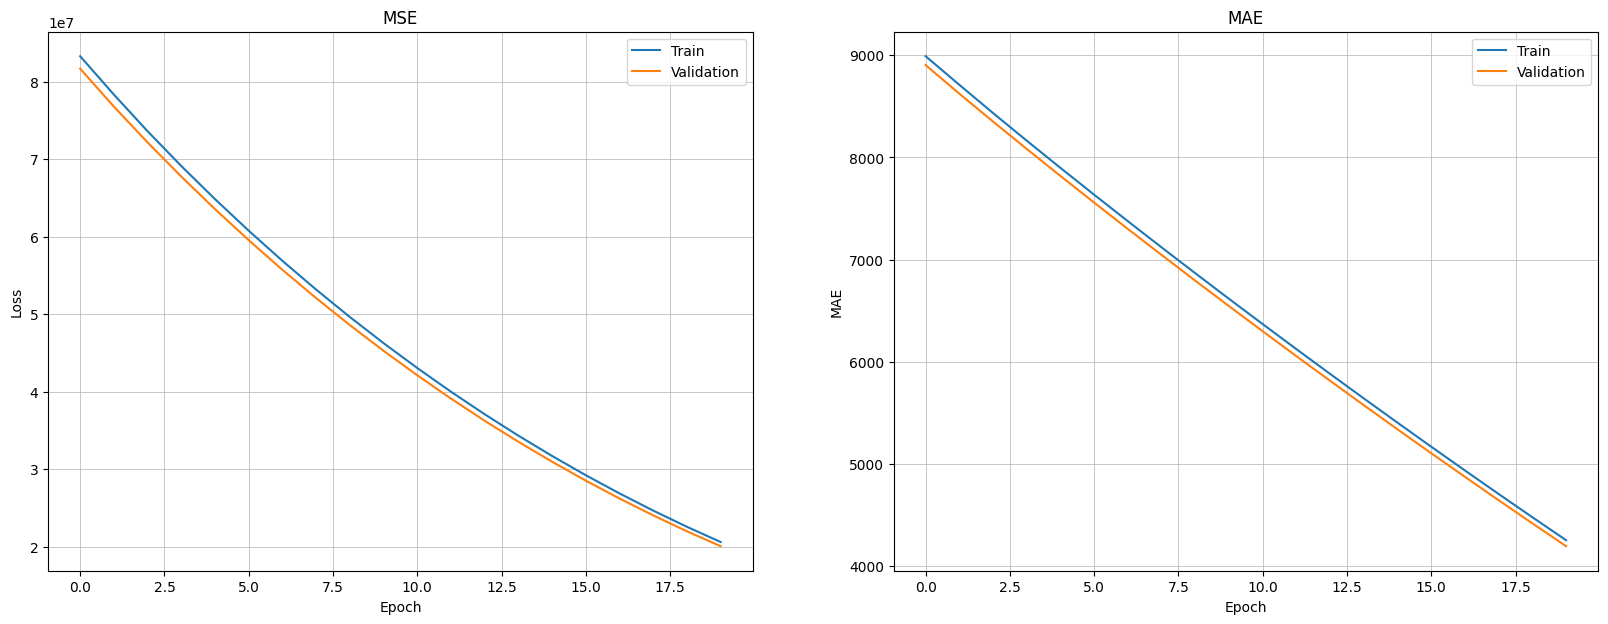

In [92]:
plot_history(history)


In [93]:
# 3 - Evaluation
# ====================================
res = model.evaluate(X_test, y_test)
print(f"The LSTM MAE on the test set is equal to {round(res[1],2)} Dollars")

105/105 [==============================] - 2s 14ms/step - loss: 134407472.0000 - mae: 10624.8447
The LSTM MAE on the test set is equal to 10624.84 Dollars


In [94]:
res

[134407472.0, 10624.8447265625]

105/105 [==============================] - 2s 15ms/step


TypeError: float() argument must be a string or a real number, not 'History'

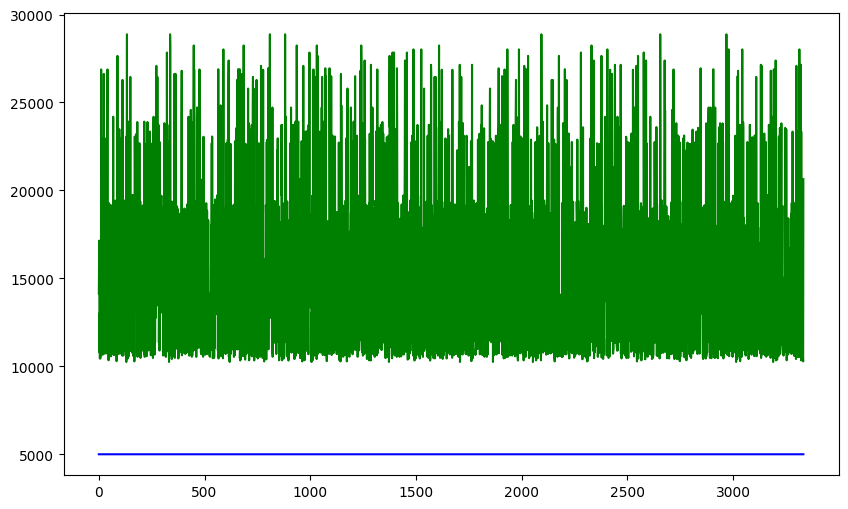

In [95]:
import matplotlib.pyplot as plt

# Graficar y_train, y_test e history
plt.figure(figsize=(10, 6))

# Graficar y_train en color azul
plt.plot(model.predict(X_test).reshape(-1,), color='blue', label='y_train')

# Graficar y_test en color verde
plt.plot(y_test.reshape(-1,), color='green', label='y_test')

# Graficar history en color rojo
plt.plot(history, color='red', label='history')

# Etiquetas y título
plt.xlabel('Timestep')
plt.ylabel('Value')
plt.title('Plot de y_train, y_test e history')

# Leyenda
plt.legend()

# Mostrar el gráfico
plt.show()


In [ ]:
y_hat = model.predict(X_test)
pd.DataFrame({"y_predicted":y_hat.reshape((-1,)),"y_true":y_test.reshape((-1,))}).head(100)

105/105 [==============================] - 2s 15ms/step


,y_predicted,y_true
0,-647.231567,26281.66
1,-1074.683105,22958.00
2,7416.906738,10537.02
3,7416.906738,11461.57
4,7416.906738,10671.77
...,...,...
95,7416.906738,11354.30
96,-1161.232544,23023.98
97,7416.906738,11486.36
98,7416.906738,10862.56


105/105 [==============================] - 1s 13ms/step


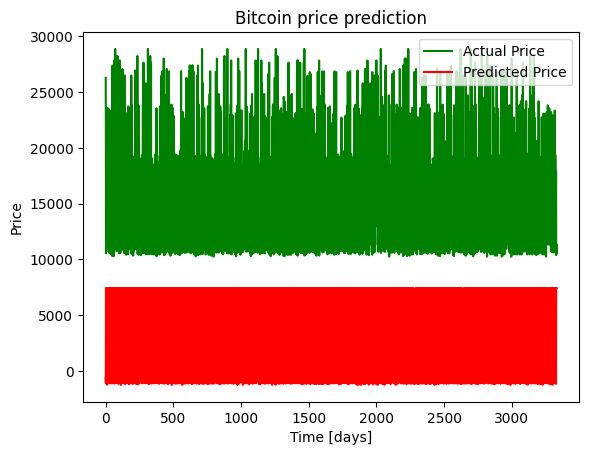

In [35]:



plt.plot(y_test.reshape((-1,)), label="Actual Price", color='green')
plt.plot(y_hat, label="Predicted Price", color='red')
 
plt.title('Bitcoin price prediction')
plt.xlabel('Time [days]')
plt.ylabel('Price')
plt.legend(loc='best')
 
plt.show();

In [ ]:
y_train

array([[[ 8799.54]],

       [[10159.19]],

       [[ 6621.24]],

       ...,

       [[ 9430.35]],

       [[11892.92]],

       [[ 8439.  ]]])